In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [9]:
width = 20
height = 10
length = 0.25
margin = 2

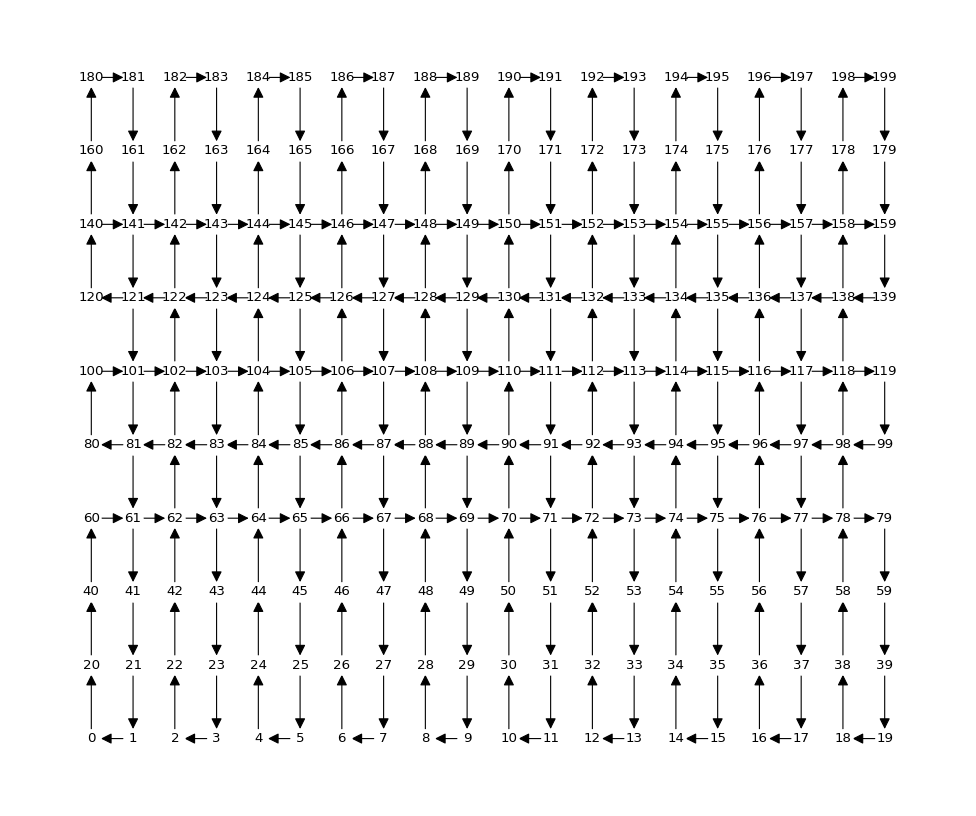

In [10]:
def initRectagnleMap(width, height, length, margin = 3):
        G = nx.DiGraph()
        rowY = 0
        totalNode = width * height
        
        width = width
        height = height
        length = length
        
        for i in range(totalNode):
            if i % width == 0 and i!=0:
                rowY += length
            G.add_node(i, pos=((i % width)*length, rowY))
        
        rowNumber=0
        colNumber=0
        for i in range(totalNode-1):
            # row
            if (i+1) % width == 0 and i != 0:
                rowNumber +=1
                continue
            
            if rowNumber % 2 == 0:
                if rowNumber == 0:
                    if i % 2 ==0:
                        G.add_edge(i+1, i)
                elif rowNumber <= margin or rowNumber >= (height - margin -1):
                    pass
                else:
                    G.add_edge(i+1, i)
            else:
                if rowNumber == height-1:
                    if i % 2 == 0:
                        G.add_edge(i, i+1)
                elif rowNumber <= margin or rowNumber >= (height -margin):
                    pass
                else:
                    G.add_edge(i, i+1)
        
        for i in range(width):
            # column
            if colNumber % 2 == 0:
                markerPoint = i
                for j in range(height-1):
                    if i == 0:
                        if margin < j <  (height-margin - 2):
                            if j % 2 == 0:
                                G.add_edge(markerPoint, markerPoint+width)
                        else:
                            G.add_edge(markerPoint, markerPoint+width)
                    else:
                        G.add_edge(markerPoint, markerPoint+width)
                    markerPoint += width
            else:
                markerPoint = i + height*width - width
                for j in range(height):
                    if (markerPoint-width) < 0:
                        continue
                    if i == width -1:
                        if margin < j <  (height-margin-2):
                            if j % 2 == 0:
                                G.add_edge(markerPoint, markerPoint-width)
                        else:
                            G.add_edge(markerPoint, markerPoint-width)
                    else:
                        G.add_edge(markerPoint, markerPoint-width)
                    markerPoint -= width
            
            colNumber +=1
            
        pos = nx.get_node_attributes(G,'pos')
        
        return G, pos
    
G, pos = initRectagnleMap(height=height, width=width, length=length, margin=margin)
figure(figsize=(12, 10), dpi=80)
nx.draw(G, pos=pos, with_labels=True, node_color='w',arrowsize= 20)



In [11]:
len(G.edges)

291

In [12]:
nx.dijkstra_path(G, 91,119)
# nx.shortest_path(G, 49,22)

[91, 90, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]

In [13]:
print([(p) for p in nx.all_shortest_paths(G, source=129, target=5)])

[[129, 128, 127, 126, 125, 105, 85, 65, 45, 25, 5], [129, 128, 127, 107, 87, 86, 85, 65, 45, 25, 5], [129, 109, 89, 88, 87, 86, 85, 65, 45, 25, 5]]
